In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pickle

In [2]:
df = pd.read_csv("data.csv", index_col=0)

In [3]:
df

,Title,URL,sentiment,confidence,Unnamed: 5
Date,,,,,
05/01/17,Eliminating shadow economy to have positive im...,http://economictimes.indiatimes.com/news/econo...,POSITIVE,0.996185,NaN
05/01/17,Two Chinese companies hit roadblock with India...,http://economictimes.indiatimes.com/news/econo...,NEGATIVE,-0.955493,NaN
05/01/17,SoftBank India Vision gets new $100,http://economictimes.indiatimes.com/small-biz/...,POSITIVE,0.595612,NaN
05/01/17,Nissan halts joint development of luxury cars ...,http://economictimes.indiatimes.com/news/inter...,NEGATIVE,-0.996672,NaN
05/01/17,Despite challenges Rajasthan continues to prog...,http://economictimes.indiatimes.com/news/polit...,POSITIVE,0.997388,NaN
...,...,...,...,...,...
12/04/21,"Realme 8 5G launch date announced , specificat...",https://www.businesstoday.in/technology/realme...,POSITIVE,0.996252,NaN
11/04/21,"Bitcoin resurges beyond $60 , 000 over reports...",https://www.businesstoday.in/markets/commoditi...,NEGATIVE,-0.994247,NaN
11/04/21,FPIs withdraw Rs 929 cr from Indian markets so...,https://www.businesstoday.in/current/economy-p...,NEGATIVE,-0.998080,NaN


In [4]:
df.isna().sum()

Title              0
URL                0
sentiment          0
confidence         0
Unnamed: 5    200500
dtype: int64

In [5]:
df = df[["Title", "sentiment"]]

In [6]:
df["sentiment"].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [7]:
df["sentiment"] = df["sentiment"].apply(lambda news: 1 if news == "POSITIVE" else 0)

C:\Users\User\AppData\Local\Temp\ipykernel_20272\2142692369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df["sentiment"].apply(lambda news: 1 if news == "POSITIVE" else 0)


In [8]:
stopWords = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [9]:
def nlpTextProcessor(sentence):
    tokenizedSent = word_tokenize(sentence)
    removedStopwords = [word for word in tokenizedSent if word not in stopWords]
    finalOutput = []
    tempOutput = []
    for word in removedStopwords:
        if word not in set("``{['?/]}().,:-@") and word not in ["''"]:
            tempOutput.append(lemmatizer.lemmatize(word))
    finalOutput = " ".join(tempOutput)
    return finalOutput

In [10]:
df["sentiment"].value_counts()

0    108118
1     92382
Name: sentiment, dtype: int64

In [11]:
df["Title"] = df["Title"].apply(nlpTextProcessor)

C:\Users\User\AppData\Local\Temp\ipykernel_20272\621941479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"] = df["Title"].apply(nlpTextProcessor)


In [12]:
df["Title"] = df["Title"].apply(lambda x: x.lower())

C:\Users\User\AppData\Local\Temp\ipykernel_20272\1551406439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"] = df["Title"].apply(lambda x: x.lower())


In [13]:
df

,Title,sentiment
Date,,
05/01/17,eliminating shadow economy positive impact gdp...,1
05/01/17,two chinese company hit roadblock indian inves...,0
05/01/17,softbank india vision get new $ 100,1
05/01/17,nissan halt joint development luxury car daiml...,0
05/01/17,despite challenge rajasthan continues progress...,1
...,...,...
12/04/21,realme 8 5g launch date announced specificatio...,1
11/04/21,bitcoin resurges beyond $ 60 000 report constr...,0
11/04/21,fpis withdraw rs 929 cr indian market far apri...,0


In [14]:
X = df["Title"]
y = df["sentiment"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [16]:
count_vector = CountVectorizer(ngram_range=(1,1))
X_train = count_vector.fit_transform(X_train)

In [17]:
X_test = count_vector.transform(X_test)

In [18]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [19]:
pred = model.predict(X_test)

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78     10860
           1       0.75      0.70      0.73      9190

    accuracy                           0.76     20050
   macro avg       0.76      0.75      0.76     20050
weighted avg       0.76      0.76      0.76     20050



In [21]:
param_grid = {'alpha': np.arange(0.01, 10.0, 0.1)}
grid_search = GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=5)

In [22]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91])})

In [23]:
grid_search.best_estimator_

MultinomialNB(alpha=0.81)

In [25]:
grid_search.cv_results_

{'mean_fit_time': array([0.07812991, 0.07822723, 0.08369379, 0.07982225, 0.08119798,
        0.07364483, 0.08023558, 0.07989397, 0.0781199 , 0.07811885,
        0.07821937, 0.07812228, 0.07811689, 0.07679434, 0.08018799,
        0.08148403, 0.07830076, 0.07983274, 0.08124404, 0.07811856,
        0.0782002 , 0.07720413, 0.08487711, 0.08341446, 0.07813635,
        0.08160119, 0.07999759, 0.07811904, 0.08441863, 0.08000507,
        0.08379669, 0.07902007, 0.07981043, 0.07307076, 0.07187581,
        0.0811142 , 0.07811818, 0.07504649, 0.07811503, 0.07818761,
        0.07811313, 0.07620602, 0.08240108, 0.08076944, 0.07827544,
        0.07519279, 0.07682986, 0.07811637, 0.07811856, 0.07824821,
        0.08124385, 0.0781837 , 0.08292003, 0.08210254, 0.07731547,
        0.07313676, 0.076232  , 0.07676125, 0.08078361, 0.07527571,
        0.07906728, 0.07836938, 0.0790205 , 0.07499356, 0.07858953,
        0.08065333, 0.07955875, 0.07853289, 0.07549887, 0.08124199,
        0.07499723, 0.07499275,

In [26]:
grid_pred = grid_search.predict(X_test)

In [27]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79     10860
           1       0.76      0.70      0.73      9190

    accuracy                           0.76     20050
   macro avg       0.76      0.76      0.76     20050
weighted avg       0.76      0.76      0.76     20050



In [28]:
def sentiment(text):
    textData = count_vector.transform([text])
    print(grid_search.predict(textData))
    pd.DataFrame(grid_search.predict_proba(textData) * 100, columns=["Negative", "Positive"]).plot(kind="bar")
    print(pd.DataFrame(grid_search.predict_proba(textData) * 100, columns=["Negative", "Positive"]))

[0]
    Negative   Positive
0  74.872006  25.127994


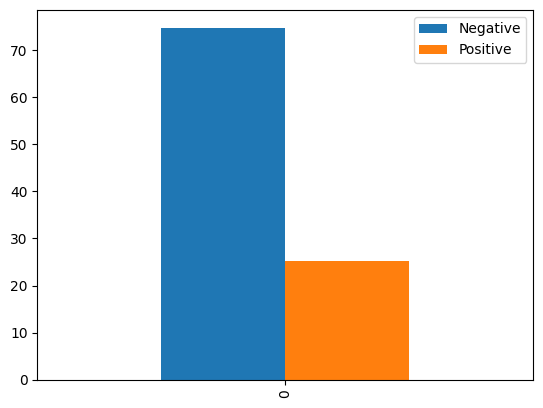

In [36]:
sentiment("""ChatGPT creator OpenAI faces US probe over libellous output """)

In [30]:
neg = [
"Major Tech Company's Stock Crashes as Revenue Plunges Amidst Global Supply Chain Disruptions",
"Investor Alarm: Stock Market Tumbles, Wiping Out Billions in Value",
"Energy Sector in Turmoil: Oil Stocks Hit Hard by Declining Demand and Price War Fears",
"Economic Uncertainty Triggers Massive Sell-Off, Sending Stock Prices Spiraling Downward",
"Retail Apocalypse: Brick-and-Mortar Stores Suffer as Online Giants Dominate, Stocks Plummet",
"Market Jitters: Trade Tensions Escalate, Sending Stocks on a Rollercoaster Ride",
"Financial Crisis Looms: Banking Sector Stocks Plunge Amidst Mounting Debt Concerns",
"Cryptocurrency Market in Chaos: Bitcoin and Altcoins Experience Sharp Declines",
"Industrial Giants Stumble: Manufacturing Slowdown Sends Shockwaves Through Stock Market",
"Pharmaceutical Industry Stumbles: Drug Trial Setbacks Cause Biotech Stocks to Plummet"
]

[0]
    Negative  Positive
0  92.939733  7.060267
[0]
    Negative  Positive
0  90.291399  9.708601
[0]
    Negative  Positive
0  94.533034  5.466966
[0]
   Negative  Positive
0  97.84579   2.15421
[0]
    Negative  Positive
0  99.611121  0.388879
[0]
    Negative  Positive
0  99.481646  0.518354
[0]
    Negative  Positive
0  99.801495  0.198505
[0]
    Negative   Positive
0  78.191919  21.808081
[0]
    Negative   Positive
0  70.709571  29.290429
[0]
    Negative  Positive
0  99.689347  0.310653


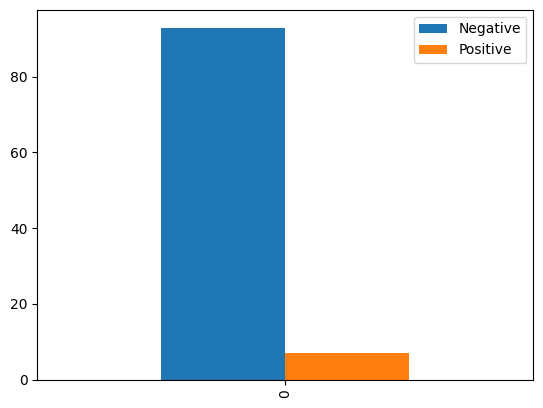

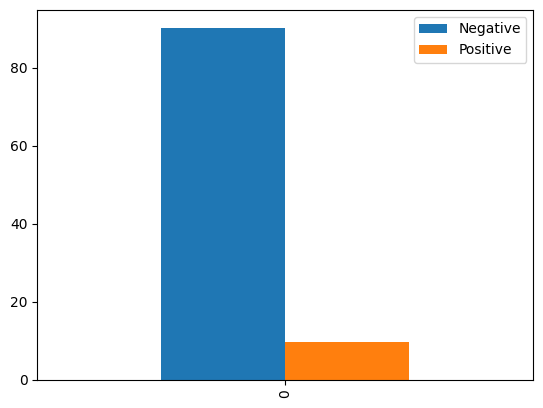

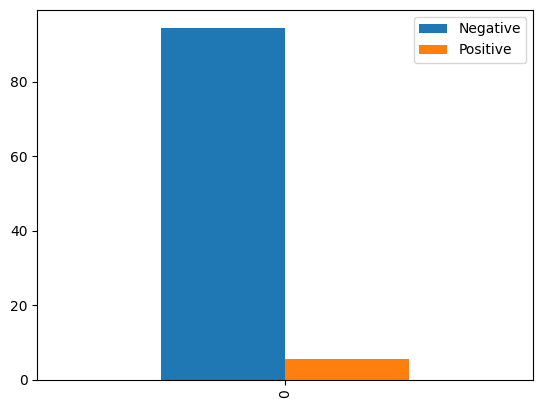

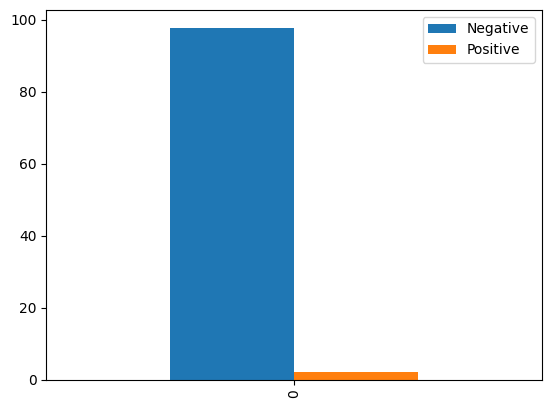

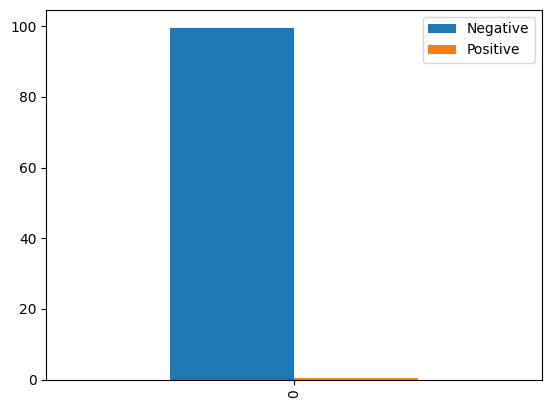

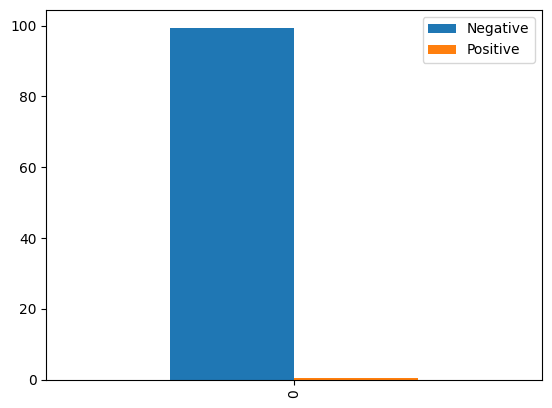

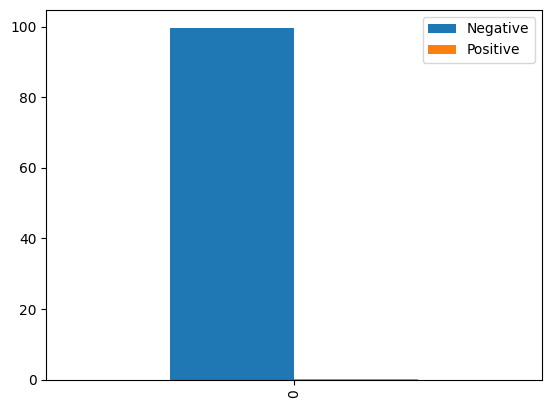

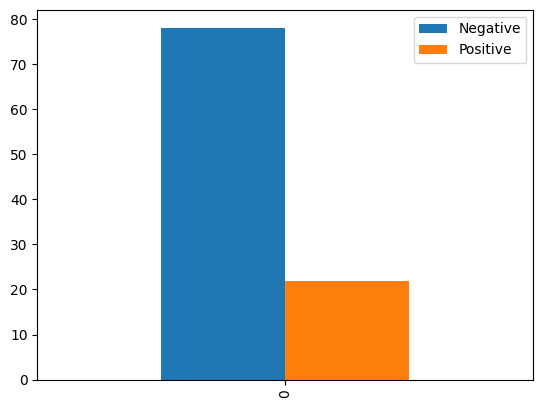

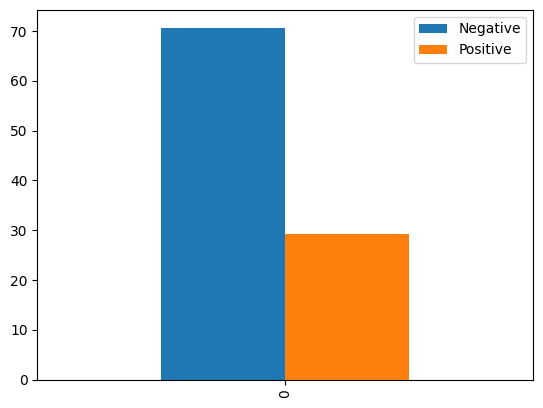

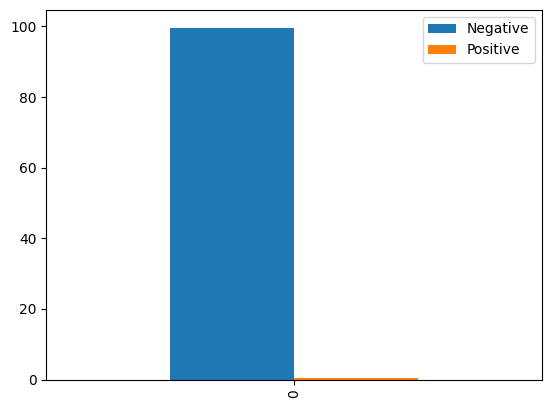

In [31]:
for news in neg:
    sentiment(news)

In [32]:
pos = [
"Tech Giant's Stock Soars to New Heights as Innovative Products Drive Record-Breaking Sales",
"Market Rally: Stock Prices Surge, Generating Massive Gains for Investors",
"Renewable Energy Sector Booms: Green Stocks Soar as Demand for Sustainable Solutions Skyrockets",
"Economic Recovery Sparks Bullish Run: Stock Market Hits All-Time Highs",
"Online Retailers Thrive: E-commerce Stocks Surge as Consumers Embrace Digital Shopping",
"Trade Optimism Fuels Investor Confidence, Propelling Stocks to Impressive Gains",
"Banking Sector Flourishes: Strong Profits and Steady Growth Drive Stocks to New Peaks",
"Cryptocurrency Market Surges: Bitcoin and Altcoins Reach New All-Time Highs",
"Manufacturing Sector Rebounds: Strong Production Numbers Drive Stock Market to New Heights",
"Biotech Breakthroughs Drive Investor Enthusiasm: Pharma Stocks Soar on Positive Drug Trial Results"
]

[1]
   Negative   Positive
0  0.079503  99.920497
[1]
    Negative   Positive
0  47.372774  52.627226
[1]
   Negative   Positive
0  0.800903  99.199097
[1]
    Negative   Positive
0  46.070438  53.929562
[1]
    Negative   Positive
0  11.009834  88.990166
[1]
   Negative   Positive
0  6.483788  93.516212
[1]
   Negative   Positive
0  0.184172  99.815828
[1]
   Negative   Positive
0  3.236107  96.763893
[1]
    Negative   Positive
0  13.736588  86.263412
[1]
   Negative  Positive
0  20.30313  79.69687


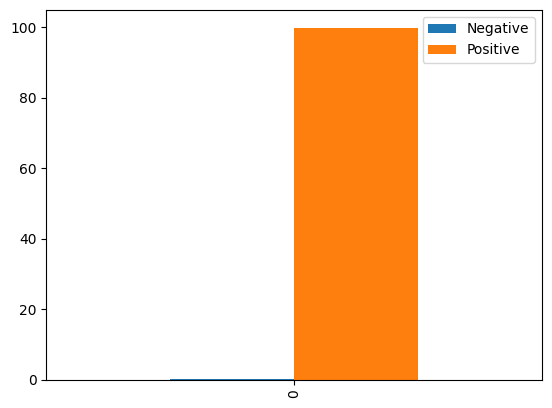

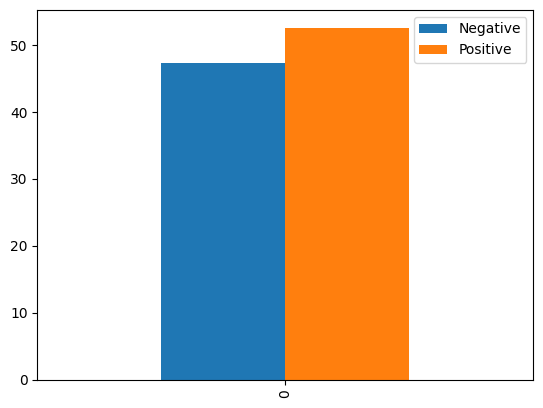

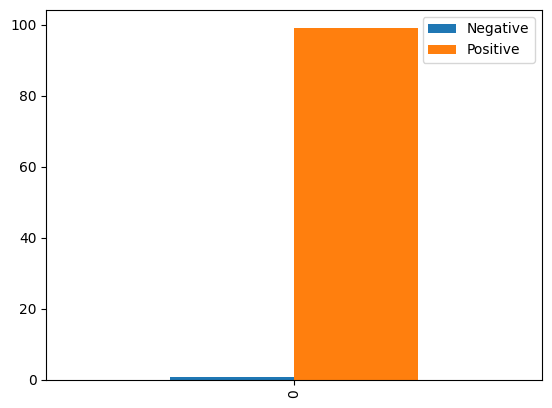

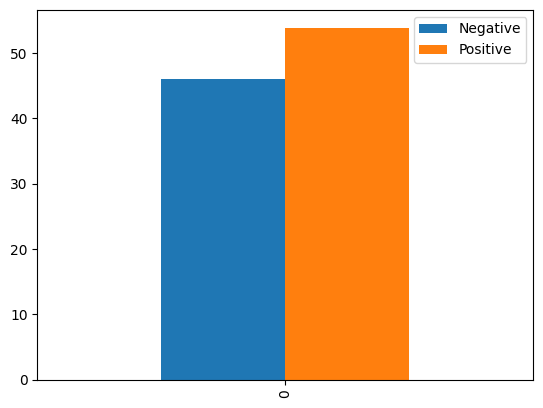

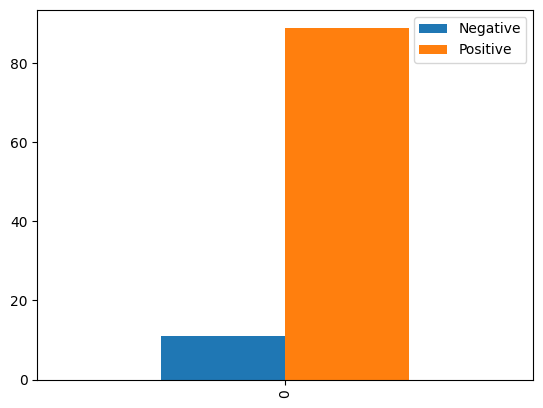

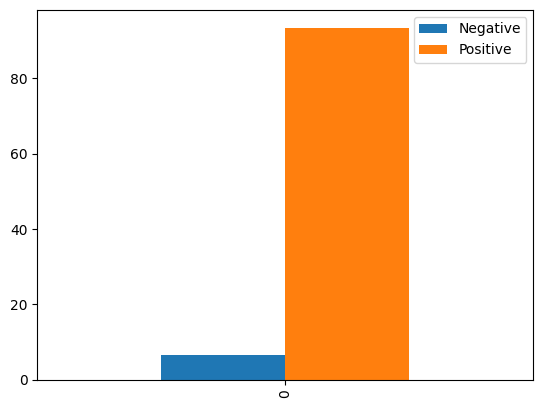

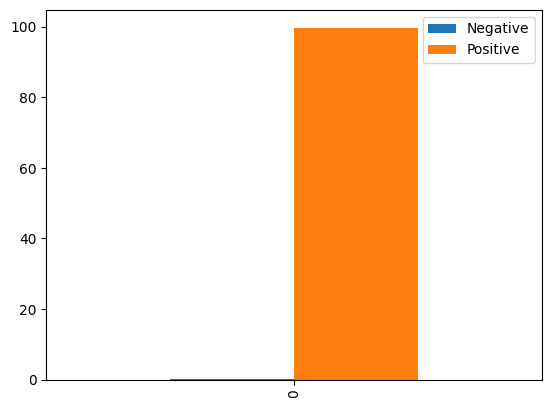

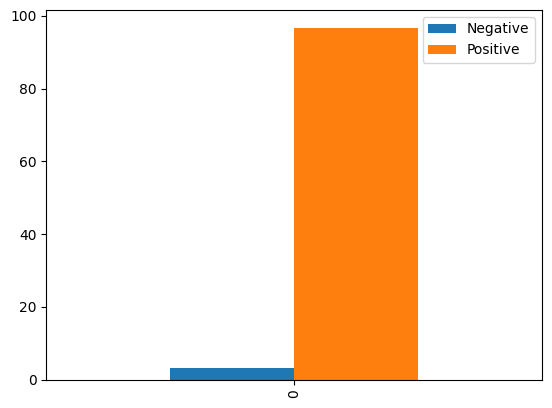

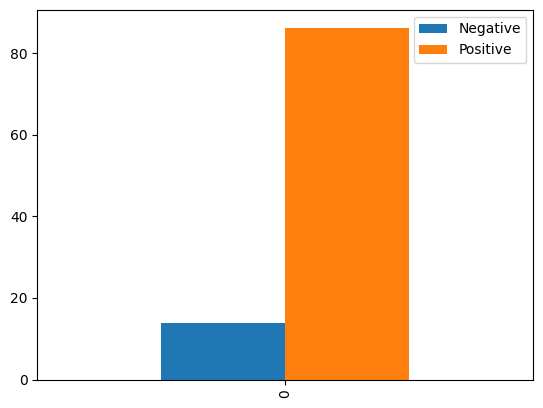

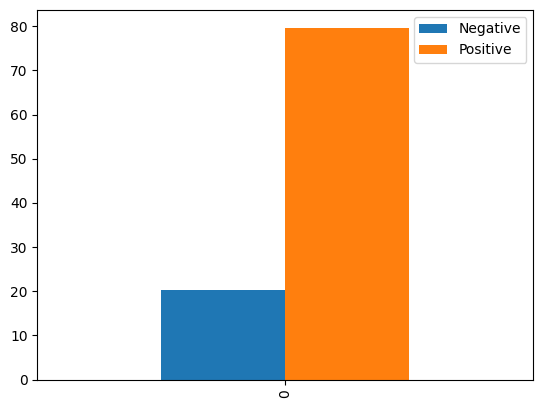

In [33]:
for news in pos:
    sentiment(news)

In [39]:
final_model = pickle.dumps(grid_search)

In [40]:
with open('newsSentiment.pkl', 'wb') as f:
    f.write(final_model)

In [34]:
vectorizer = pickle.dumps(count_vector)
with open('vectorizer.pkl', 'wb') as f:
    f.write(vectorizer)

In [38]:
len(count_vector.get_feature_names_out())

40697